In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('/home/growlt259/Desktop/Inventory_Prediction_Retail_Market.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Promotion Code,Employee ID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,A,62.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,A,46.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,C,13.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,B,22.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,C,79.0


In [3]:
data['sales'] = data['Quantity'] * data['UnitPrice']

In [160]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [4]:
data['Date'] = data['InvoiceDate'].dt.date

In [5]:
data = data[data['Quantity'] > 0]

In [6]:
data.shape

(531279, 12)

In [7]:
data.drop(['Promotion Code', 'Employee ID'], axis=1, inplace=True)

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(526050, 10)

In [9]:
sales_by_product = data.groupby('StockCode')['sales'].sum()

In [10]:
sorted_sales = sales_by_product.sort_values(ascending=False)

# Select the top 100 products
top_100_products = sorted_sales.head(250)

In [11]:
print(top_100_products.sum())
print(data['sales'].sum())
print(top_100_products.sum()/data['sales'].sum())

5603828.41
10619911.554000003
0.5276718531511038


In [12]:
freq_items = []
for i in top_100_products.index:
    freq_items.append(i)
print(freq_items)

['DOT', 22423, 23843, '85123A', 47566, '85099B', 23166, 'POST', 'M', 23084, 22086, 84879, 79321, 22502, 22197, 23298, 22386, 23203, 21137, 23284, 22720, 22960, 82484, 20725, 22178, 22114, 22910, 22112, '85099F', 22469, 23245, 21931, 22727, 23199, 22470, 22355, 22699, 23355, 22411, 20685, '85099C', 22457, 23201, 22726, 21175, 84347, 21915, 22666, 84946, 22629, 22961, 48138, 21181, 23173, 21621, 22111, 22722, 22326, 22138, 48187, 21731, 48185, 23344, 23243, 22189, 21733, 21929, 82482, 20713, 21623, 22139, 22090, 22697, 85066, 22383, 20727, '15056N', 48194, 20712, '84029E', 23202, 20724, 20728, 22630, 21523, 23209, 21843, 21212, 21928, 21166, 23206, 22659, 22728, 71477, 21479, '84997D', '82494L', 22501, 22328, 22467, 22969, 15036, 20914, 82486, 20726, 21108, 22382, 22693, 22835, 22865, 21485, 22698, 22384, 22077, 22385, 23240, 82583, 22492, 21754, 20719, 22993, 84978, 22624, '84078A', 23301, 21232, '84029G', '84997B', 85152, '15056BL', 23313, 22379, 82483, 22084, 22900, '84997C', 22752, 2

In [157]:
freq_data = data[data['StockCode'].isin(freq_items)]

In [158]:
freq_data.set_index('InvoiceDate', inplace=True)
freq_data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,sales,Date
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom,15.30,2010-12-01
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom,20.34,2010-12-01
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,United Kingdom,20.34,2010-12-01
2010-12-01 08:26:00,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,7.65,17850.0,United Kingdom,15.30,2010-12-01
2010-12-01 08:28:00,536366,22633,HAND WARMER UNION JACK,6.0,1.85,17850.0,United Kingdom,11.10,2010-12-01


In [159]:
daily_sales = freq_data.sales.resample('D').sum()
daily_sales

InvoiceDate
2010-12-01     29624.64
2010-12-02     25311.40
2010-12-03     26792.35
2010-12-04         0.00
2010-12-05     14771.89
                ...    
2011-12-05     44051.42
2011-12-06     28596.28
2011-12-07     40203.63
2011-12-08     42827.75
2011-12-09    186375.10
Freq: D, Name: sales, Length: 374, dtype: float64

<Axes: xlabel='InvoiceDate'>

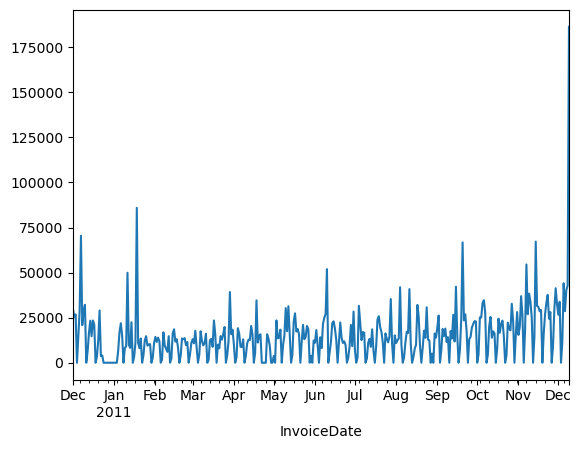

In [40]:
daily_sales.plot()

# Smoothing

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

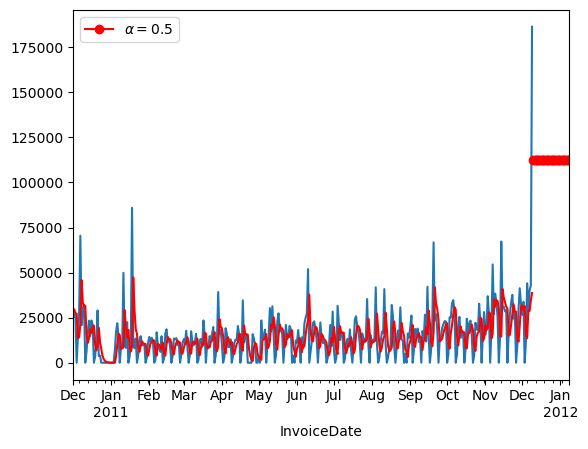

In [18]:
alpha = 0.5

daily_sales.plot.line()
fit1 = SimpleExpSmoothing(daily_sales).fit(smoothing_level= alpha,optimized=False)
fcast1 = fit1.forecast(30).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

<Axes: xlabel='InvoiceDate'>

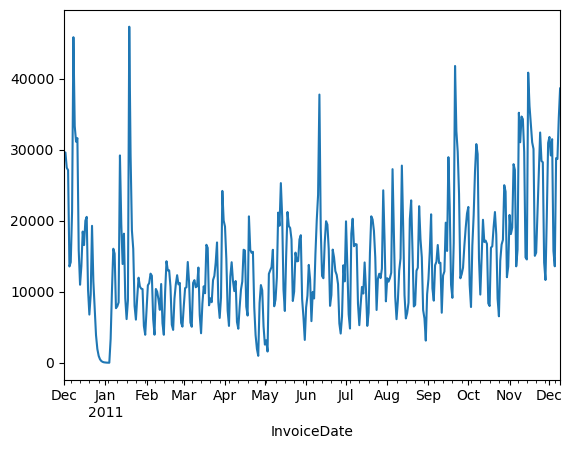

In [19]:
fit1.fittedvalues.plot()

# LSTM

Interpolation

In [76]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [107]:
daily_sales.replace(0, np.nan, inplace=True)
daily_sales.interpolate(method='linear', inplace=True)

In [108]:
daily_sales

InvoiceDate
2010-12-01     29624.64
2010-12-02     25311.40
2010-12-03     26792.35
2010-12-04     20782.12
2010-12-05     14771.89
                ...    
2011-12-05     44051.42
2011-12-06     28596.28
2011-12-07     40203.63
2011-12-08     42827.75
2011-12-09    186375.10
Freq: D, Name: sales, Length: 374, dtype: float64

In [94]:
values = daily_sales.values
values

array([ 29624.64      ,  25311.4       ,  26792.35      ,  20782.12      ,
        14771.89      ,  28402.92      ,  70433.95      ,  20811.11      ,
        28935.3       ,  32152.75      ,  19154.475     ,   6156.2       ,
        16271.89      ,  23330.83      ,  14677.66      ,  23434.71      ,
        21098.64      ,  12198.085     ,   3297.53      ,  12382.89      ,
        28992.03      ,   3705.48      ,   4041.11      ,   4263.9025    ,
         4486.695     ,   4709.4875    ,   4932.28      ,   5155.0725    ,
         5377.865     ,   5600.6575    ,   5823.45      ,   6046.2425    ,
         6269.035     ,   6491.8275    ,   6714.62      ,  17037.55      ,
        21922.58      ,  14686.04      ,  11449.545     ,   8213.05      ,
         9056.3       ,  49905.81      ,   9992.99      ,   8225.97      ,
        22450.4       ,  12828.925     ,   3207.45      ,  11377.03      ,
        85910.38      ,  11092.18      ,   8038.97      ,  13429.18      ,
         8781.525     ,  

In [95]:
n_steps = 3
# split into samples
X, y = prepare_data(values, n_steps)

In [96]:
X.shape

(371, 3)

In [97]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [98]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [49]:
train_size = 344  # 11 months of data for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [93]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), shuffle=False)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0036 - val_loss: 2372747264.0000
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - val_loss: 2372748288.0000
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033 - val_loss: 2372748032.0000
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - val_loss: 2372748032.0000
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - val_loss: 2372748032.0000
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 2372747520.0000
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 2372747520.0000
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - val_loss: 2372747520.0000
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - val_loss: 2372748032.0000
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 2372747776.0000
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - 

In [52]:
from sklearn.metrics import r2_score

# Make predictions
y_pred = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R² score: -0.07388644134590439


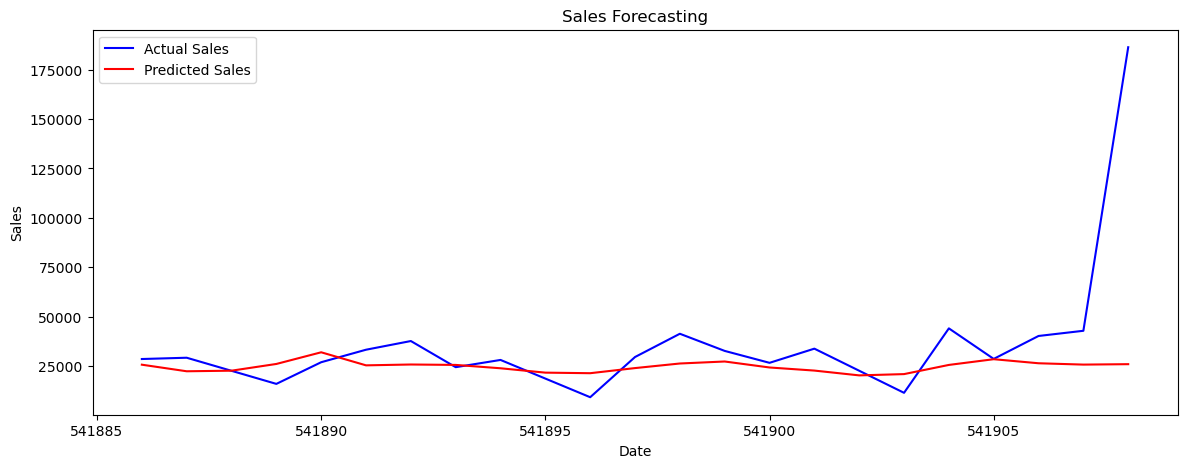

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(data.index[-len(y_test):], y_test, color='blue', label='Actual Sales')
plt.plot(data.index[-len(y_pred):], y_pred, color='red', label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting')
plt.legend()
plt.show()

In [99]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [100]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 607279488.0000
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 444494592.0000
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 473842464.0000
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 469758688.0000
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 341641664.0000
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 508791360.0000 
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 369580416.0000
Epoch 8/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 157753888.0000
Epoch 9/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 128177784.0000
Epoch 10/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 310514112.0000
Epoch 11/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 136582352.0000
Epoch 12/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 187225168.0000
Epoch 13/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 174577904.0000
Epoch 14/300
12/12 ━━━━━━━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 151196528.0000
Epoch 77/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 128426144.0000
Epoch 78/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 305361024.0000
Epoch 79/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 149206928.0000
Epoch 80/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 145217920.0000
Epoch 81/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 116474472.0000
Epoch 82/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 190987024.0000
Epoch 83/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 139148208.0000
Epoch 84/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 168691232.0000
Epoch 85/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 132664880.0000
Epoch 86/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 159054192.0000
Epoch 87/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 133912680.0000
Epoch 88/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 144818112.0000
Epoch 89/300
12/12 ━━━━━━━━━━━━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 112321400.0000
Epoch 151/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 161216832.0000
Epoch 152/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 132771640.0000
Epoch 153/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 182169552.0000
Epoch 154/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 228633376.0000
Epoch 155/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 124133504.0000
Epoch 156/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 200177392.0000
Epoch 157/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 230173120.0000
Epoch 158/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 255331104.0000
Epoch 159/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 234121680.0000
Epoch 160/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 150059840.0000
Epoch 161/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 143238848.0000
Epoch 162/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 143042192.0000
Epoch 163/300
12/12 ━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 168132304.0000
Epoch 225/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 153407760.0000
Epoch 226/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 139764816.0000
Epoch 227/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 125508616.0000
Epoch 228/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 177564960.0000
Epoch 229/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 184544000.0000
Epoch 230/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 247976928.0000
Epoch 231/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 130933224.0000
Epoch 232/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 202967504.0000
Epoch 233/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 216885376.0000
Epoch 234/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 176467616.0000
Epoch 235/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 261906528.0000
Epoch 236/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 114655544.0000
Epoch 237/300
12/12 ━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 145879872.0000
Epoch 299/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 120824696.0000
Epoch 300/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 149998144.0000


In [109]:
df = daily_sales.values
df.reshape(-1, 1)
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Define window size (number of time steps to look back)
window_size = 7

# Function to create dataset with input features and target variable
def create_dataset(data, window_size):
    X, Y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        Y.append(data[i + window_size])
    return np.array(X), np.array(Y)

# Create dataset
X, Y = create_dataset(scaled_data, window_size)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

ValueError: Expected 2D array, got 1D array instead:
array=[ 29624.64        25311.4         26792.35        20782.12
  14771.89        28402.92        70433.95        20811.11
  28935.3         32152.75        19154.475        6156.2
  16271.89        23330.83        14677.66        23434.71
  21098.64        12198.085        3297.53        12382.89
  28992.03         3705.48         4041.11         4263.9025
   4486.695        4709.4875       4932.28         5155.0725
   5377.865        5600.6575       5823.45         6046.2425
   6269.035        6491.8275       6714.62        17037.55
  21922.58        14686.04        11449.545        8213.05
   9056.3         49905.81         9992.99         8225.97
  22450.4         12828.925        3207.45        11377.03
  85910.38        11092.18         8038.97        13429.18
   8781.525        4133.87        12402.93        14724.3
   9495.75        10133.18        10317.57         6507.105
   2696.64        10981.03        14352.07        11541.63
  13879.59        11964.27         6868.73         1773.19
  16833.79         9599.99         7762.64         6025.69
  14733.41         8534.3          2335.19        16163.55
  18546.21        11703.46        13040.34         8411.21
   6155.535        3899.86        13432.76        13050.99
  13622.14         9749.22        11452.21         8000.115
   4548.02        10859.11        13058.4         10761.63
  17752.           8402.35         6440.72         4479.09
  17419.89        12027.08         9636.62        10917.73
  16045.72         8825.36         1605.          12479.43
  13209.73         8829.23        23445.04        15746.49
  12908.47        10070.45         7971.92        14762.49
  12818.31        15962.95        19796.48        11973.215
   4149.95        12086.66        39212.51        15856.
  18336.79        10156.48         6598.855        3041.23
  19139.47        16155.95         8847.06         8685.28
  12937.07         8383.385        3829.7         10780.17
  12790.44        12583.36        20400.29        15689.59
  10540.51         5391.43        34598.74        11189.45
  15060.65        15777.69        15784.816       15791.942
  15799.068       15806.194       15813.32        13483.98
   9465.1          7566.96333333   5668.82666667   3770.69
  13617.055       23463.42        13522.07        13922.73
  18355.35        14088.525        9821.7         15163.27
  30273.55        17442.61        31314.71        15881.04
  10086.515        4291.99        22859.56        27393.44
  17296.16        18688.97        15818.31        13582.735
  11347.16        21000.6         13056.88        14370.46
  20412.08        18564.4         11223.175        3881.95
   8122.05        12362.15        11099.04        18125.07
   9663.6         11881.55        14099.5          8133.08
  21521.81        24903.75        27170.53        51922.84
  28738.075        5553.31        11590.38        21969.89
  22943.23        18982.21        12601.02        11832.695
  11064.37        22337.54        13768.02        10968.16
  11854.82         9760.26         6226.12         2691.98
   8930.98        20945.62         9187.03        28378.67
   7349.24         5084.38         2819.52        31576.3
  22380.77        12540.58        17029.95        16618.14
   9433.43         2248.72        11010.65        13209.82
   8818.78        18508.91         6639.81         7765.835
   8891.86        23913.91        25781.57        19737.82
  16997.82        11143.07        13694.755       16246.44
  13248.3         11295.99        14607.56        35320.2
  10313.41        12741.86        15170.31        10931.6
  12406.32        13452.18        41856.16         9922.07
   6447.5          2972.93        11342.78        17197.41
  16457.02        40833.44        10336.01         6650.095
   2964.18         7741.43         9921.35        32047.16
  25498.11         8836.71         8595.625        8354.54
  17782.62        13822.31        30716.9         12844.72
  12270.26         8664.005        5057.75        10625.18
  16192.61        13907.11        19534.45        26162.44
  16602.145        7041.85        18739.61        14715.6
  18945.15        11474.7         14148.69        15845.32
  17541.95        13441.32        26595.01        11758.98
  42172.66        14959.12        11133.26         7307.4
  24596.84        66743.89        23469.03        26825.89
  17874.35        15462.25        13050.15        14284.53
  19514.77        21515.99        23086.49        22861.92
  13794.055        4726.19        25183.27        25046.52
  33046.67        34687.9         27988.54        16248.625
   4508.71        20136.74        25412.26        13873.19
  17400.57        16270.52        11941.825        7613.13
  24429.81        16616.61        21775.85        23368.73
  14893.06         9475.575        4058.09        22191.53
  18915.99        17973.42        32718.59        23195.55
  19122.565       15049.58        28090.82        15437.15
  19937.85        36912.45        26362.55        22318.125
  18273.7         54504.31        26905.49        38314.56
  33949.31        25062.77        19656.59        14250.41
  67178.93        31474.6         30962.47        28536.57
  29190.24        22566.91        15943.58        26914.36
  33245.45        37641.6         24405.1         28068.84
  18632.955        9197.07        29550.66        41324.93
  32642.07        26608.16        33781.73        22604.68
  11427.63        44051.42        28596.28        40203.63
  42827.75       186375.1       ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [111]:
df.shape

(374,)

In [113]:
daily_sales = pd.DataFrame(daily_sales)

In [114]:
daily_sales

,sales
InvoiceDate,
2010-12-01,29624.64
2010-12-02,25311.40
2010-12-03,26792.35
2010-12-04,20782.12
2010-12-05,14771.89
...,...
2011-12-05,44051.42
2011-12-06,28596.28
2011-12-07,40203.63


In [116]:
values_reshaped = daily_sales['sales'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values_reshaped)

# Assign scaled values back to the DataFrame
daily_sales['scaled_sales'] = scaled_values

# Create sequences for LSTM
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 5
scaled_data = daily_sales['scaled_sales'].values.reshape(-1, 1)
X, y = create_sequences(scaled_data, time_steps)

In [117]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [118]:
train_size = 344
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [120]:
# Build and train LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0040 - val_loss: 0.0380
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - val_loss: 0.0368
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - val_loss: 0.0383
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - val_loss: 0.0393
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0360
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - val_loss: 0.0384
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - val_loss: 0.0352
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 0.0373
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - val_loss: 0.0373
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - val_loss: 0.0362
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - val_loss: 0.0353
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - val_loss: 0.0346
Epoch 70/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - val_loss: 0.0350
Epoch 71/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042 - val_loss: 0.0351
Epoch 72/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 0.0329
Epoch 73/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0339
Epoch 74/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - val_loss: 0.0342
Epoch 75/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - val_loss: 0.0351
Epoch 76/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - val_loss: 0.0334
Epoch 77/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - val_loss: 0.0345
Epoch 78/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - val_loss: 0.0352
Epoch 79/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - val_loss: 0.0355
Epoch 80/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 

In [121]:
predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


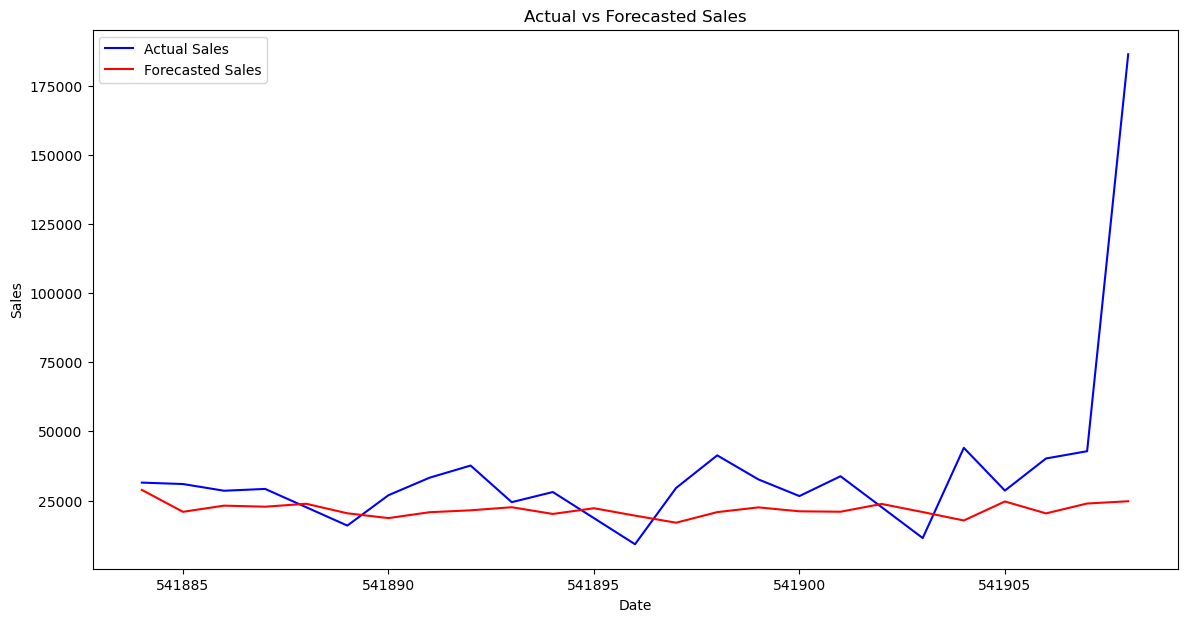

In [122]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, color='blue', label='Actual Sales')
plt.plot(data.index[-len(y_test):], predicted_values, color='red', label='Forecasted Sales')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [124]:
last_60_days = scaled_data[-60:]
next_30_days = []

for _ in range(30):
    X_input = last_60_days[-60:].reshape((1, 60, 1))
    predicted_value = model.predict(X_input)
    next_30_days.append(predicted_value[0, 0])
    last_60_days = np.append(last_60_days, predicted_value, axis=0)

next_30_days = np.array(next_30_days).reshape(-1, 1)
next_30_days = scaler.inverse_transform(next_30_days)

# Create a date range for the next 30 days
future_dates = pd.date_range(data.index[-1] + pd.Timedelta(1), periods=30)

# Plot actual, forecasted, and predicted future values
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['sales'], color='blue', label='Actual Sales')
plt.plot(data.index[-len(y_test):], predicted_values, color='red', label='Forecasted Sales')
plt.plot(future_dates, next_30_days, color='green', label='Predicted Future Sales')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

TypeError: unsupported operand type(s) for +: 'numpy.int64' and 'Timedelta'

In [134]:
# Import the required libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and preprocess the time series data
# Perform data preprocessing steps (e.g., handle missing values, normalization)

# Split the data into training and testing sets
train_size = 344
train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]

# Prepare the input and output sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error:", mse)

KeyError: 10

In [133]:
daily_sales.drop(['scaled_sales'], axis = 1, inplace=True)

In [131]:
daily_sales.columns

Index(['sales', 'scaled_sales'], dtype='object')

In [141]:
weekly_sales = freq_data.sales.resample('W').sum()
weekly_sales

InvoiceDate
2010-12-05     96500.28
2010-12-12    186892.23
2010-12-19    102111.26
2010-12-26     49121.51
2011-01-02         0.00
2011-01-09     68573.84
2011-01-16    102838.92
2011-01-23    133981.61
2011-01-30     59770.37
2011-02-06     64491.78
2011-02-13     57290.71
2011-02-20     71764.63
2011-02-27     65855.34
2011-03-06     65312.58
2011-03-13     67652.04
2011-03-20     83780.37
2011-03-27     75462.10
2011-04-03     98689.67
2011-04-10     69594.53
2011-04-17     77635.28
2011-04-24     76626.53
2011-05-01     42533.09
2011-05-08     79085.27
2011-05-15    114367.17
2011-05-22    113403.60
2011-05-29     91286.37
2011-06-05     65349.36
2011-06-12    139205.32
2011-06-19     99151.10
2011-06-26     71380.78
2011-07-03     77611.06
2011-07-10    102394.46
2011-07-17     67079.83
2011-07-24    113820.63
2011-07-31     99955.77
2011-08-07     91541.26
2011-08-14     99130.84
2011-08-21     92399.30
2011-08-28     92494.56
2011-09-04     82838.46
2011-09-11     95565.70
2011

<Axes: xlabel='InvoiceDate'>

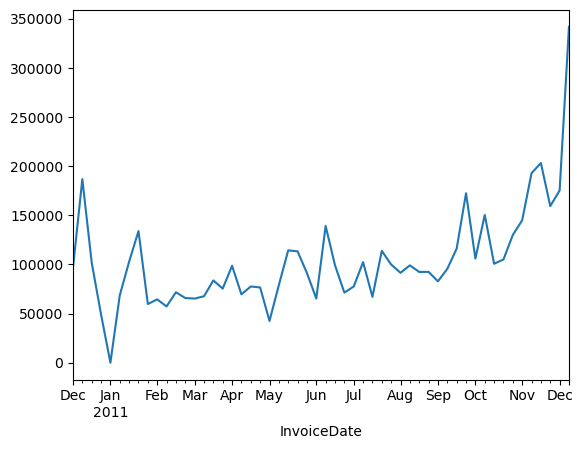

In [142]:
weekly_sales.plot()

In [ ]:
train_size = int(len(daily_sales) - 30)
train, test = daily_sales.iloc[:train_size], daily_sales.iloc[train_size:]

In [153]:
p_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
d_values = [1, 2]
q_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [155]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.s

best_score, best_cfg = -1, None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            model = ARIMA(train, order=order)
            model_fit = model.fit()
            
            forecast = model_fit.forecast(steps=30)
            
            R2_score = r2_score(forecast, test)
            
            if R2_score > best_score:
                best_score = R2_score
                best_cfg = order
                
            print(R2_score, order)

-4233.61740066274 (1, 1, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-3580.454742838023 (1, 1, 2)
-3723.9503573830807 (1, 1, 3)
-9815.258541162408 (1, 1, 4)
-323.12225038489885 (1, 1, 5)
-1582.0523720128297 (1, 1, 6)
-738.5436626283575 (1, 1, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-179.6913924438208 (1, 1, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-132.63827708898066 (1, 1, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-134.5604847645838 (1, 1, 10)
-1008.1066657526682 (1, 2, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-546.9168423206755 (1, 2, 2)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-716.4411492653439 (1, 2, 3)
-1129.0186565107442 (1, 2, 4)
-1127.4946044805133 (1, 2, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-882.7157303384827 (1, 2, 6)
-1000.6983160282841 (1, 2, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-1311.24288171159 (1, 2, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-2808.037856371368 (1, 2, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-166.05852341908405 (1, 2, 10)
-5535.705999557604 (2, 1, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-1993.476740842472 (2, 1, 2)
-1851.0242693118994 (2, 1, 3)
-2094.2073595145303 (2, 1, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-166.3460439587056 (2, 1, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-186.64198910123005 (2, 1, 6)
-543.4708944983262 (2, 1, 7)
-189.07450670307944 (2, 1, 8)
-184.88553430398684 (2, 1, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-116.42394483966261 (2, 1, 10)
-897.7683631560432 (2, 2, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-1136.3519553978044 (2, 2, 2)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-1446.2036890305387 (2, 2, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-1022.523292064462 (2, 2, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-1042.7433068728183 (2, 2, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-1023.5852858649123 (2, 2, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-934.0016323494928 (2, 2, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-622.8301221856864 (2, 2, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-627.6191354738239 (2, 2, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-261.6515599799845 (2, 2, 10)
-8011.998499186179 (3, 1, 1)
-12784.813418653239 (3, 1, 2)
-2038.6728775012443 (3, 1, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-862.5887742042192 (3, 1, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-1214.999886739989 (3, 1, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-160.5846424127449 (3, 1, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-131.91335629163896 (3, 1, 7)
-177.92347632906905 (3, 1, 8)
-178.2502689135291 (3, 1, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-79.28304749901469 (3, 1, 10)
-753.4475408073548 (3, 2, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-1212.2158977119707 (3, 2, 2)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-257.62948214790055 (3, 2, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-796.8961584393661 (3, 2, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-614.6957905440083 (3, 2, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-612.2045367168893 (3, 2, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-666.1911834408758 (3, 2, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-782.6134824190632 (3, 2, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-284.6884368419214 (3, 2, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-606.1614254624363 (3, 2, 10)
-6958.525398490476 (4, 1, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-4429.773663266791 (4, 1, 2)
-578.8474884216586 (4, 1, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-1120.821978998646 (4, 1, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-101.67765386296301 (4, 1, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-46.68630800405323 (4, 1, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-87.05053487026471 (4, 1, 7)
-181.37843549060082 (4, 1, 8)
-175.50522072390254 (4, 1, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-88.5278439219675 (4, 1, 10)
-1006.3656047787425 (4, 2, 1)
-823.8117942159632 (4, 2, 2)
-434.1738370682902 (4, 2, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-626.5511774850778 (4, 2, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-611.3329472055336 (4, 2, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-270.57872440160594 (4, 2, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-308.31855106873184 (4, 2, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-79.654571146442 (4, 2, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-89.06283757075806 (4, 2, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-84.93461084385754 (4, 2, 10)
-629.9255957465439 (5, 1, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-90.2981289115802 (5, 1, 2)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-190.88142648057433 (5, 1, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-126.97345459434658 (5, 1, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-59.681145062364116 (5, 1, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-45.438755379251795 (5, 1, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-67.15146663146517 (5, 1, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-54.96444876377217 (5, 1, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-52.5860154472131 (5, 1, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-43.48195825669552 (5, 1, 10)
-445.67622084658166 (5, 2, 1)
-1118.8464416390711 (5, 2, 2)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-1069.3995443835927 (5, 2, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-440.30302491589646 (5, 2, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-423.23558797531746 (5, 2, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-256.3043581119107 (5, 2, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-105.27623629439677 (5, 2, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-124.92078402279094 (5, 2, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-286.49277552592446 (5, 2, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


-103.08329749330882 (5, 2, 10)
-220.57248577930636 (6, 1, 1)
-227.44648962315912 (6, 1, 2)
-221.5048059315266 (6, 1, 3)
-268.3872144234329 (6, 1, 4)
-216.37919765925403 (6, 1, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-80.44538874192554 (6, 1, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-49.82879437621665 (6, 1, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-38.66942018985011 (6, 1, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-39.85456556578072 (6, 1, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-36.370758020197684 (6, 1, 10)
-230.7240007691872 (6, 2, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-178.02085448005099 (6, 2, 2)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-184.69855036922155 (6, 2, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-184.93902040389287 (6, 2, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-215.44105538220285 (6, 2, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-74.32778822367173 (6, 2, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-104.05090748544632 (6, 2, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-68.9270622513392 (6, 2, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-60.990197655823806 (6, 2, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-68.87634539318059 (6, 2, 10)
-153.6852914133967 (7, 1, 1)
-138.2161083406597 (7, 1, 2)
-136.57494422037396 (7, 1, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-137.57773697571866 (7, 1, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive par

-81.46728075404943 (7, 1, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-57.13787504273057 (7, 1, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-40.27495067954438 (7, 1, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-41.14182269408689 (7, 1, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-40.559485724516094 (7, 1, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-37.12816888700043 (7, 1, 10)
-182.83771281779377 (7, 2, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-181.1828579033263 (7, 2, 2)
-152.728749225835 (7, 2, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-155.31405644456615 (7, 2, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-156.6785932729278 (7, 2, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-190.17703733252606 (7, 2, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-124.04243966936521 (7, 2, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-58.89479715965379 (7, 2, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-38.86277136254786 (7, 2, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34.324474780404245 (7, 2, 10)
-136.08687402395077 (8, 1, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-67.64070123916295 (8, 1, 2)
-138.17570008567873 (8, 1, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-138.6234291862102 (8, 1, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-137.27765982849522 (8, 1, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-51.41284733303964 (8, 1, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-45.365789866488065 (8, 1, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-39.87620188220535 (8, 1, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-39.98072521720719 (8, 1, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-40.85022203124432 (8, 1, 10)
-184.17379170149846 (8, 2, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-165.87844192909665 (8, 2, 2)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-244.90412218693442 (8, 2, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-174.9455833381793 (8, 2, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-180.27074577588493 (8, 2, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-121.26659914912487 (8, 2, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-40.44226702542264 (8, 2, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-79.24870616552192 (8, 2, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-38.33469514531843 (8, 2, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34.88773213233565 (8, 2, 10)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-136.01126562155724 (9, 1, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-123.69138400529717 (9, 1, 2)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-67.85344661624822 (9, 1, 3)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-122.31276613848627 (9, 1, 4)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-91.76973077641033 (9, 1, 5)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


-61.13211274160969 (9, 1, 6)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-36.855260719633044 (9, 1, 7)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-39.94435551097511 (9, 1, 8)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-42.02677433704419 (9, 1, 9)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-34.969124224558655 (9, 1, 10)
-184.45980342532886 (9, 2, 1)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-159.04222504457763 (9, 2, 2)


/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/growlt259/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-203.6041429765209 (9, 2, 3)


LinAlgError: LU decomposition error.